In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

In [4]:
filename = '../Sandbox/ca-500.csv'

df = pd.read_csv(filename, sep=';')
df

first_name      last_name                    company_name  \
0      Francoise  Rautenstrauch               Riebesell, H F Jr   
1         Kendra           Loud               Deloitte & Touche   
2        Lourdes       Bauswell               Oklahoma Neon Inc   
3         Hannah        Edmison              M B A Paint Stores   
4            Tom          Loeza       Sheraton Shreveport Hotel   
5        Queenie     Kramarczyk        Goeman Wood Products Inc   
6            Hui        Portaro     A Storage Inn Of Gloucester   
7         Josefa          Opitz               Norman Gale Isuzu   
8            Lea      Steinhaus          James, Christopher Esq   
9          Paola         Vielma                  Congress Title   
10     Hortencia        Bresser     Batavia Chamber Of Commerce   
11        Leanna       Tijerina       Stephenson Land Surveying   
12        Danilo          Pride      Harry L Adams Incorporated   
13          Huey       Marcille  Southern Idaho Pipe & Stl Corp   
14      Apolonia          Warne                  Kitchen People   
15       Chandra          Lagos       Meredith Realty Group Inc   
16        Crissy       Pacholec                 Cgi Systems Inc   
17        Gianna         Branin    All Brevard Cert Apprsls Inc   
18      Valentin          Billa            General Color Co Inc   
19         Ilona         Dudash        Adams Balcom & Larose Pc   
20       Willard        Lablanc   Mershon Metal Specialties Inc   
21        Lauryn         Randol               Judy, Henry L Esq   
22       Laurena          Begin            Barry, Anthony S Esq   
23         Elise       Michelle          Thurman, William T Esq   
24        Corrie        Kardell             Lynch, Steven J Esq   
25     Kimberely         Rabuse               Carey, Paul D Esq   
26          Tish        Violett    Electro Arc Manufacturing Co   
27        Hollis      Stanfield       Feehan Plumbing & Heating   
28        Andree     Christmann         Easton Cooperative Bank   
29          Lyla        Fucillo      Hambro Forest Products Inc   
30        Felton         Yafuso              Penkava, Robert Md   
31          Dell         Polino   Saint John Neumann Nurse Home   
32        Nohemi           Leko                Bohne, Karl W Jr   
33        Tambra         Lembke             Moore, Albert F Esq   
34         Vicki    Maikoksoong      George Bigham & Associates   
35        Renato        Airhart                   Super 8 Motel   
36        Lenita         Darbro                   Ball, David S   
37        Barney          Hagen               Fox Vision Center   
38       Matthew       Armacost       Livingston & Schneider Pc   
39         Belen         Nelton               A Peter Howell Pc   
40         Iesha         Wardle               Honker Cut Marine   
41     Francesco        Sarchet            Gabriel & Associates   
42       Paulene          Rhule                Beck Corporation   
43        Carole       Hughlett             Kolodny, Howard Esq   
44          Miss        Dunning              Mcgladrey & Pullen   
45      Elfrieda         Hinsch                      Y 105 Kgfy   
46      Edelmira        Calzado      Chagrin Wine & Beverage Co   
47         Jaime       Wasurick             Lewis, George L Esq   
48          Lera            Hua    York Services Landscpg Divsn   
49          Jame         Mastro     Janney Montgomery Scott Inc   
50       Jillian      Hailstone      Global Securities Info Inc   
51         Louis        Zarling                  Dealers Mfg Co   
52        Emmett         Mcshaw              Yaffa, Michael Esq   
53         Tammy           Sams                      Photos Inc   
54        Willis          Wylie          Acquired Knowledge Inc   
55        Maxima     Brzozowski                  B Js Body Shop   
56         Boris          Latif                  Emlou Boutique   
57        Salina         Knavel              Schiller & Osbourn   
58         Justa           Dini         Superior Coff

In [6]:
provinces = df['province']

provinces.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: province
Non-Null Count  Dtype 
--------------  ----- 
500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


<Axes: ylabel='province'>

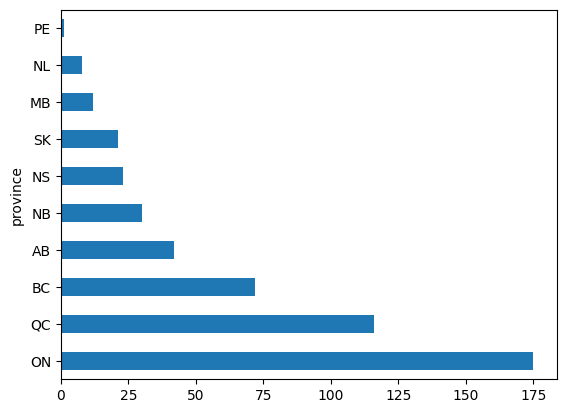

In [14]:
provinces.value_counts().plot(kind='barh')


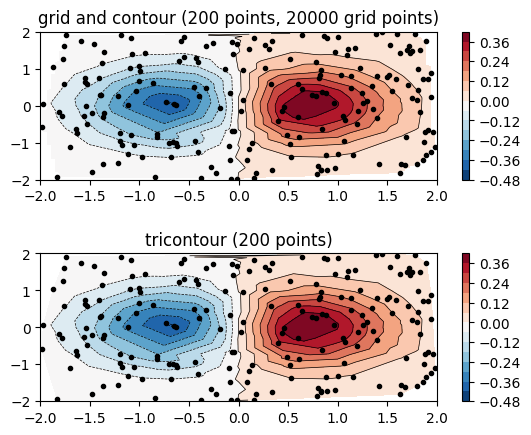

In [15]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

np.random.seed(19680801)
npts = 200
ngridx = 100
ngridy = 200
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
z = x * np.exp(-x**2 - y**2)

fig, (ax1, ax2) = plt.subplots(nrows=2)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(-2.1, 2.1, ngridx)
yi = np.linspace(-2.1, 2.1, ngridy)

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
# from scipy.interpolate import griddata
# zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko', ms=3)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('grid and contour (%d points, %d grid points)' %
              (npts, ngridx * ngridy))

# ----------
# Tricontour
# ----------
# Directly supply the unordered, irregularly spaced coordinates
# to tricontour.

ax2.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=3)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('tricontour (%d points)' % npts)

plt.subplots_adjust(hspace=0.5)
plt.show()